In [3]:
import matplotlib.pyplot as plt
import pandas as pd

from bubblekicker.bubblekicker import (BubbleKicker, batchbubblekicker, bubble_properties_calculate, 
                                       _bubble_properties_filter, bubble_properties_plot)

from bubblekicker.pipelines import CannyPipeline, AdaptiveThresholdPipeline

In [4]:
%matplotlib inline

In [9]:
path = r'C:\Users\Giacomo\Documents\gitRepos\Serena\shared_nbks/'
imgname = 'classe 5.JPG'

# CANNY PIPELINE

Steps undertaken since from raw image:
edge-detect with thresholds 120 -> 180 - opencv
dilate with footprintsize 3 - opencv
fill holes - opencv
clear border with buffer size 3 and bgval 1 -  skimage
erode with footprintsize 1 - opencv




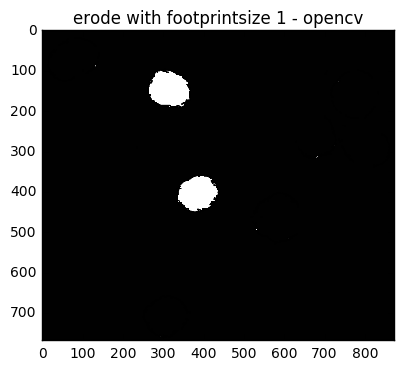

In [20]:
granulecheck = CannyPipeline(path + imgname, channel='blue')
result = granulecheck.run([120, 180], 3, 3, 1, 1)
# show the resulting image of the detected bubbles
granulecheck.plot()
# show the individual steps performed to get this result
granulecheck.what_have_i_done()

## example filtering with standard values

In [14]:
#calculate properties
marker_image, props = bubble_properties_calculate(result) 

{'min': 0.92}
{'max': 1.6, 'min': 0.2}


In [15]:
props.head()

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal
label,,,,,,,
7,8375,"(148.13480597, 314.155820896)",8709,103.263649,374.492424,22.363603,1.332574
8,27,"(102.407407407, 101.185185185)",27,5.863230,16.828427,1.604428,0.834667
10,52,"(108.615384615, 701.5)",64,8.136858,31.313708,1.660615,1.500568
12,34,"(157.0, 831.411764706)",37,6.579525,22.485281,1.512100,1.183335
15,36,"(197.416666667, 727.083333333)",39,6.770275,22.485281,1.601047,1.117595


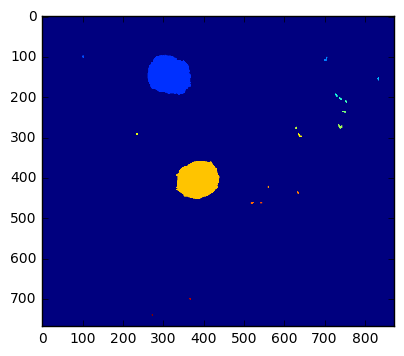

In [16]:
plt.imshow(marker_image)

## example filtering with custom values

<b> Changing the 'Circularity reciprocal' max value from 1.2 to 1.5 you can consider more circular particles and also the big ones are falling in

In [21]:
#calculate properties
marker_image, props = bubble_properties_calculate(result, 
                                                  rules={'convexity':{'min':0.}, 
                                                                 'circularity_reciprocal':{'max':1.5, 'min':0.3}}) 

{'max': 1.5, 'min': 0.3}
{'min': 0.0}


In [22]:
props.head()

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal
label,,,,,,,
7,8375,"(148.13480597, 314.155820896)",8709,103.263649,374.492424,22.363603,1.332574
8,27,"(102.407407407, 101.185185185)",27,5.863230,16.828427,1.604428,0.834667
12,34,"(157.0, 831.411764706)",37,6.579525,22.485281,1.512100,1.183335
15,36,"(197.416666667, 727.083333333)",39,6.770275,22.485281,1.601047,1.117595
16,36,"(206.083333333, 737.416666667)",38,6.770275,22.485281,1.601047,1.117595


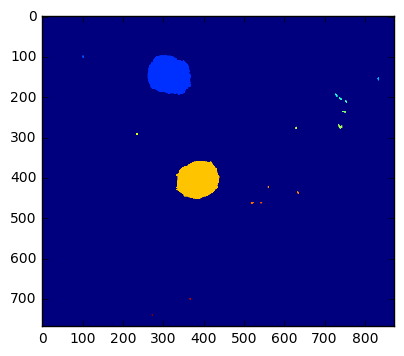

In [23]:
plt.imshow(marker_image)

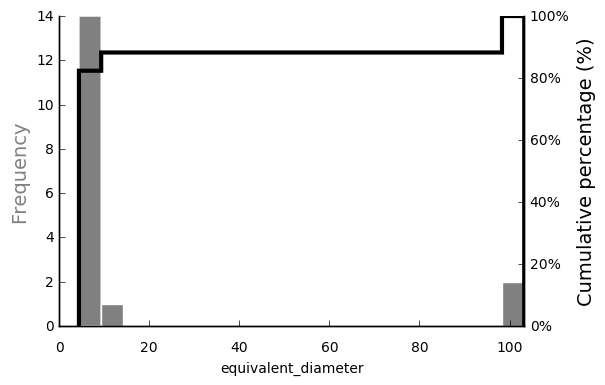

In [24]:
fig, axs = bubble_properties_plot(props, "equivalent_diameter")  # make a plot

# ADAPTIVE THRESHOLD PIPELINE

Steps undertaken since from raw image:
adaptive threshold bubble detection with blocksize 101 and cvalue 15 - opencv
clear border with buffer size 3 and bgval 1 -  skimage
erode with footprintsize 1 - opencv




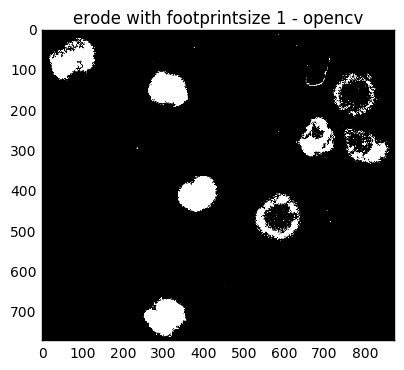

In [35]:
granulecheck = AdaptiveThresholdPipeline(path + imgname, channel='red')
result = granulecheck.run(101, 15, 3, 1, 1)
# show the resulting image of the detected granules
granulecheck.plot()

# show the individual steps performed to get this result
granulecheck.what_have_i_done()

In [22]:
#calculate properties
marker_image, props = bubble_properties_calculate(result, 
                                                  rules={'convexity':{'min':0.}, 
                                                                 'circularity_reciprocal':{'max':1.2, 'min':0.3}}) 

{'max': 1.2, 'min': 0.3}
{'min': 0.0}


In [23]:
props.head()

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal
label,,,,,,,
7,17,"(10.5294117647, 360.176470588)",20,4.652426,13.035534,1.304128,0.795424
10,17,"(14.0, 766.470588235)",24,4.652426,14.828427,1.146447,1.029275
29,33,"(40.303030303, 488.606060606)",37,6.482045,21.656854,1.523767,1.131011
40,15,"(63.0, 747.133333333)",17,4.370194,12.863961,1.166048,0.877907
55,12,"(91.8333333333, 457.75)",14,3.908820,12.071068,0.994113,0.966274


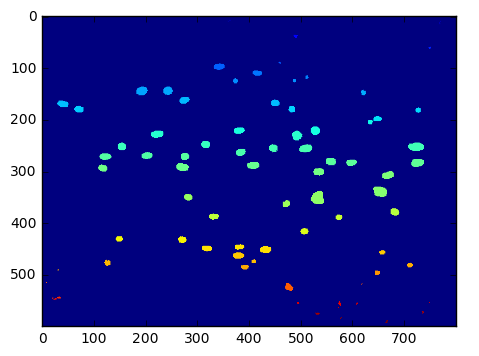

In [24]:
plt.imshow(marker_image)